In [59]:
# Main imports
%matplotlib inline

import math
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

plt.style.use('fivethirtyeight')

In [60]:
# Read Data
df = web.DataReader('AMZN', data_source='yahoo', start='2012-01-01', end='2021-10-27')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,179.479996,175.550003,175.889999,179.029999,5110800,179.029999
2012-01-04,180.500000,176.070007,179.210007,177.509995,4205200,177.509995
2012-01-05,178.250000,174.050003,175.940002,177.610001,3809100,177.610001
2012-01-06,184.649994,177.500000,178.070007,182.610001,7008400,182.610001
2012-01-09,184.369995,177.000000,182.759995,178.559998,5056900,178.559998
...,...,...,...,...,...,...
2021-10-21,3440.280029,3403.000000,3414.250000,3435.010010,1881400,3435.010010
2021-10-22,3429.840088,3331.300049,3421.000000,3335.550049,3133800,3335.550049
2021-10-25,3347.800049,3297.699951,3335.000000,3320.370117,2226000,3320.370117


In [61]:
df.shape

(2472, 6)

In [62]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [63]:
# Import yfinance package
import yfinance as yf

# Set the start and end date
start_date = '1990-01-01'
end_date = '2021-12-12'

# Set the ticker
ticker = 'AMZN'

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-21,3414.25000,3440.280029,3403.000000,3435.010010,3435.010010,1881400
2021-10-22,3421.00000,3429.840088,3331.300049,3335.550049,3335.550049,3133800
2021-10-25,3335.00000,3347.800049,3297.699951,3320.370117,3320.370117,2226000
2021-10-26,3349.51001,3416.120117,3343.979980,3376.070068,3376.070068,2693700
2021-10-27,3388.00000,3412.000000,3371.453369,3393.879883,3393.879883,726851


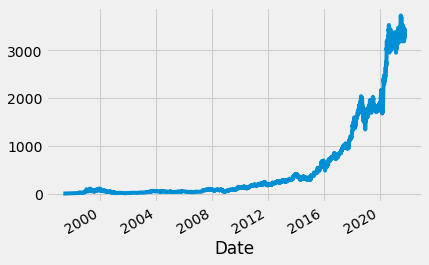

In [64]:
# Plot adjusted close price data
data['Adj Close'].plot()
plt.show()

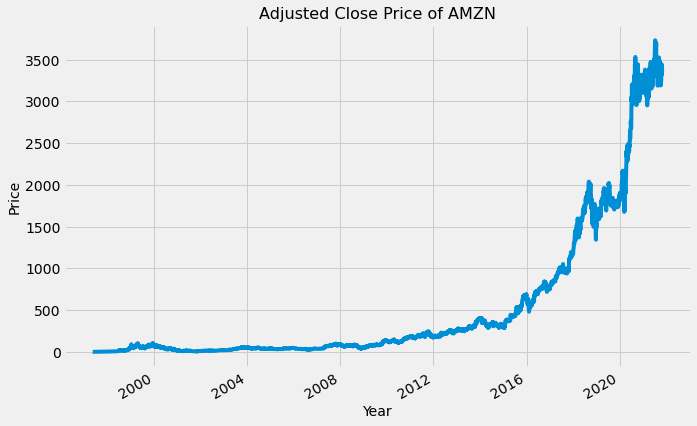

In [65]:
# Plot the adjusted close price
data['Adj Close'].plot(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("Adjusted Close Price of %s" % ticker, fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
# plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)

# Show the plot
plt.show()

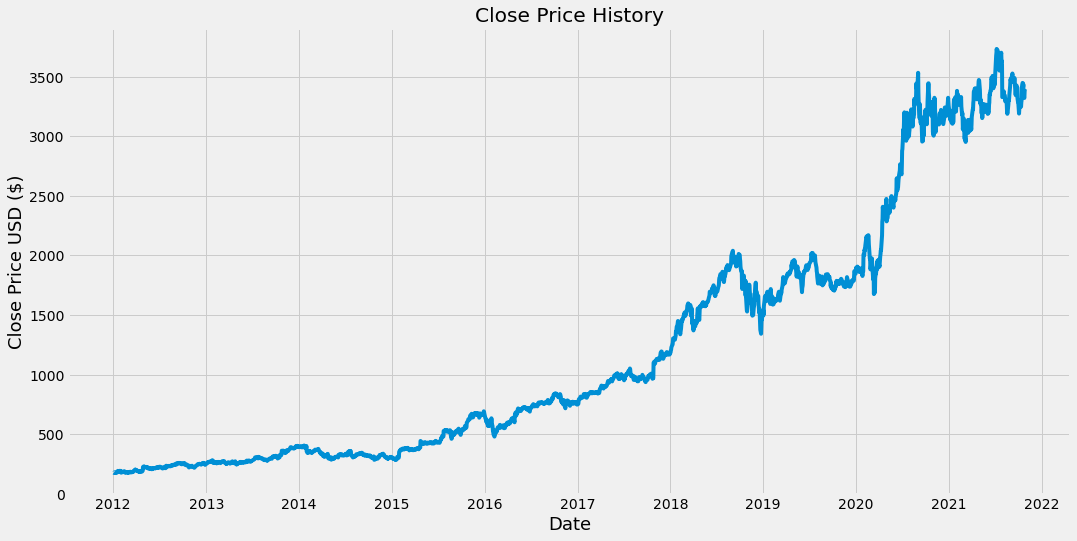

In [66]:
#Visualise the close price

plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize =18)
plt.show()

In [67]:
# Extract the 'Close' column in a dataframe

data = df.filter(['Close'])

In [68]:
# Convert the dataframe to a numpy array

dataset = data.values

In [69]:
# Get the number of rows to train the model on

training_data_len = math.ceil(len(dataset) * 0.8)
training_data_len

1978

In [72]:
# Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[8.71895264e-04],
       [4.44384968e-04],
       [4.72512283e-04],
       ...,
       [8.84392598e-01],
       [9.00058543e-01],
       [9.05067660e-01]])